# Исследование закономерностей, определяющих успешной игры для планирования рекламных компаний на предстоящий год + проверка гипотез


## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)

**Цель исследования** - нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Исходные данные** - имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План:**

- Изучить данные
- Выполнить предобработку даных (почистить пропуски, дубликаты, поправить тип данных
- Провести исследовательский анализ данных (поработать с выбросами, найти ответы на поставленные вопросы)
- Составьте портрет пользователя каждого региона
- Провести статистический анализ данных и проверить гипотезы
- Написать общий вывод и рекомендации

**Необходимо узнать:**

- сколько игр выпускалось в разные годы
- как менялись продажи по платформам
- какие платформы лидируют по продажам, растут или падают
- как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- соотнести выводы с продажами игр на других платформах
- самые популярные платформы (топ-5)
- самые популярные жанры (топ-5)
- влияет ли рейтинг ESRB на продажи в отдельном регионе
- проверить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- проверить гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Загрузка данных

In [1]:
#загрузим необходимые библиотеки
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
#загрузим имеющийся файл, сохраним его в переменной и посмотрим первые и последние строки
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
#посмотрим информацию о каждом столбце
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** данные успешно загружены. Видно, что наименование каждого столбца начинается с заглавной буквы. И необходимо изменить тип данных в некоторых столбцах.

## Подготовка данных

### Переименование столбцов

In [4]:
# переведем все наименования в нижний регистр
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод:** Перевели все буквы в названиях столбцов в нижний регистр

### Удаление дубликатов

In [5]:
# проверим данные на наличие явных дубликатов
data.duplicated().sum()

0

In [6]:
# проверим данные на наличие неявных дубликатов
data[['platform', 'year_of_release', 'name']].duplicated().sum()

2

In [7]:
#посмотрим на наши дубликаты
data[data.duplicated(['platform', 'year_of_release', 'name'], keep=False)].sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [8]:
data[['platform', 'year_of_release', 'name']].nunique()

platform              31
year_of_release       37
name               11559
dtype: int64

In [9]:
#удаляем неявные дубликаты
data = data.drop_duplicates(['platform', 'year_of_release', 'name'], keep='first')
data[['platform', 'year_of_release', 'name']].duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Вывод:** Видно, что 2 строки удалены. Но в данных так же имеется большое количество пропусков. Поработаем над ними

### Удаление / заполнение пропусков

In [11]:
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [12]:
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16, grid=True, use_index=True,\
                  xlabel=('Наименование столбца'))
            .set_title('Процент пропусков в столбцах' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

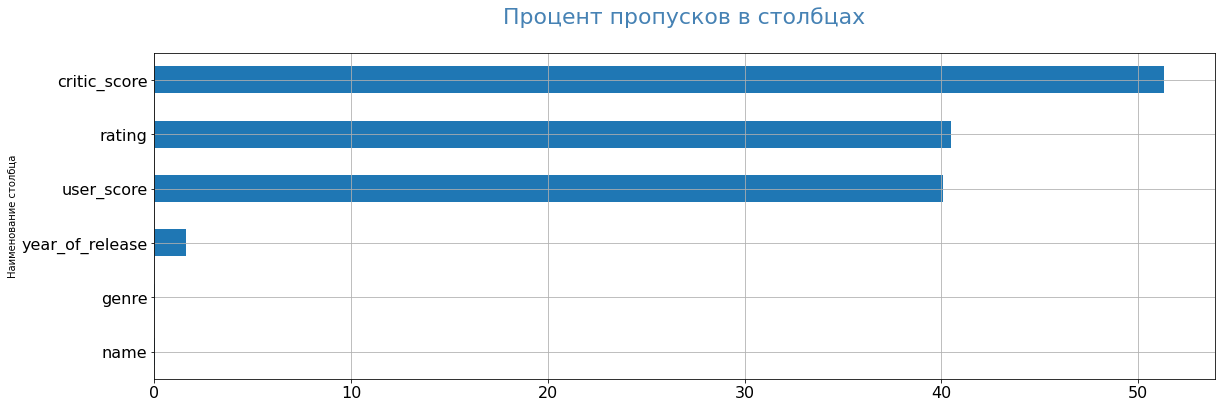

In [13]:
pass_value_barh(data)

Видно, что в столбце `name` только 1 пропуск, помотрим на него

In [14]:
# столбец name
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [15]:
#удаляем пропуск
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [16]:
# столбец year_of_release
print(f' Процент пропусков = {(data["year_of_release"].isna().sum() / data["name"].count() * 100).round(3)}')

 Процент пропусков = 1.61


In [17]:
# столбец year_of_release
print(f"Сумма продаж по пропускам в Америке {data.query('year_of_release.isna()')['na_sales'].sum()}")
print(f"Сумма продаж по пропускам в Европе {data.query('year_of_release.isna()')['eu_sales'].sum()}")
print(f"Сумма продаж по пропускам в Европе {data.query('year_of_release.isna()')['jp_sales'].sum()}")

Сумма продаж по пропускам в Америке 59.15
Сумма продаж по пропускам в Европе 24.46
Сумма продаж по пропускам в Европе 6.699999999999999


Так как процент пропусков в столбце `year_of_release` достаточно мал (1.61%), при этом при оценке данных год являетсяя точной характеристикой для нас. Пропуски удаляем.

In [18]:
#удаляем пропуски
data = data.dropna(subset=['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В оставщихся столбцах (`critic_score`, `user_score`, `rating`) имеется практически одинаковое количество пропусков. Посмотрим на процентное соотношение с заполненными данными, чтобы оценить критичность данных пропусков.

In [19]:
print(f' Процент пропусков в столбце critic_score = '
      f'{(data["critic_score"].isna().sum()/ data["name"].count() * 100).round(3)}')
print(f' Процент пропусков в столбце user_score = '
      f'{(data["user_score"].isna().sum() / data["name"].count() * 100).round(3)}')
print(f' Процент пропусков в столбце rating = '
      f'{(data["rating"].isna().sum() / data["name"].count() * 100).round(3)}')

 Процент пропусков в столбце critic_score = 51.457
 Процент пропусков в столбце user_score = 40.169
 Процент пропусков в столбце rating = 40.601


Половина данных в этих столбцах - пропуски. Изучим подробнее.

**critic_score**

In [20]:
data["critic_score"].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [21]:
data["critic_score"].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64

**user_score**

In [22]:
data["user_score"].describe()

count     9838
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [23]:
data["user_score"].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
0.9       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

**Вывод:** Пока пропуски в столбцах `critic_score` и `user_score` оставим, так как их заполнение может оказать существенное влияние на дальнейшее исследование, возможно в дальнейшем придется все же выполнить заполнение.

**rating**

In [24]:
data["rating"].describe()

count     9767
unique       8
top          E
freq      3920
Name: rating, dtype: object

In [25]:
data["rating"].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

**Значение рейтинга:**

EC	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.

E	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.

E 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.

T	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

M	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.

AO	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.

RP	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

K-A - "Kids to Adults"

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий</b></font>
    <br /> 
    <font size="3", color = "black">
<br />  Предположу, что пропуске в поле raiting мы можем заполнить значением "RP" (категория еще не присвоена), чтобы они тоже участвовали при группировке данных. 

Рейтинги, по которым мало значений, можно объединить с более крупными группами. Мы объединим их так:
        
        -  ЕС заменим на E
        -  AO заменим на M
        -  K-A заменим на E

In [26]:
data["rating"] = data["rating"].fillna('RP')
data["rating"].value_counts()

RP      6677
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [27]:
data.loc[(data['rating'] == 'EC'), 'rating'] = 'E'
data.loc[(data['rating'] == 'AO'), 'rating'] = 'M'
data.loc[(data['rating'] == 'K-A'), 'rating'] = 'E'
data["rating"].value_counts()

RP      6677
E       3931
T       2905
M       1537
E10+    1393
Name: rating, dtype: int64

### Изменение типа данных

In [28]:
# столбец critic_score
data["critic_score"] = data["critic_score"].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


При смене типа данных в столбце "user_score" выходит ошибка `ValueError: could not convert string to float: 'tbd'` в столбце присутствует значение 'tbd', что означает "будет решено". 


In [29]:
data["user_score"].describe()

count     9838
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

Значения 'tbd' встречаются чаще остальных, а именно 2376 раз

In [30]:
print(f'Что составляет '
f'{((data[data["user_score"] == "tbd"]["user_score"].count()) / (data["name"].count())*100).round(3)} '
      f'% от всех значений')

Что составляет 14.45 % от всех значений


Заменим значения 'tbd' на Nan, так как от этого смысл не изменится и поменяем тип данных на float

In [31]:
data.loc[data["user_score"] == "tbd", "user_score"] = np.nan
data["user_score"].describe()

count     7462
unique      95
top        7.8
freq       322
Name: user_score, dtype: object

In [32]:
# меняем тип данных в столбце user_score
data["user_score"] = data["user_score"].astype('float')

In [33]:
data["year_of_release"] = data["year_of_release"].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод:** В столбцах `critic_score`, `year_of_release`, `user_score` тип данных успешно изменен

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [34]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы. 

Важны ли данные за все периоды?

In [35]:
df = data.groupby('year_of_release')['name'].count().reset_index()
df.columns=('year_of_release', 'count')
df

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


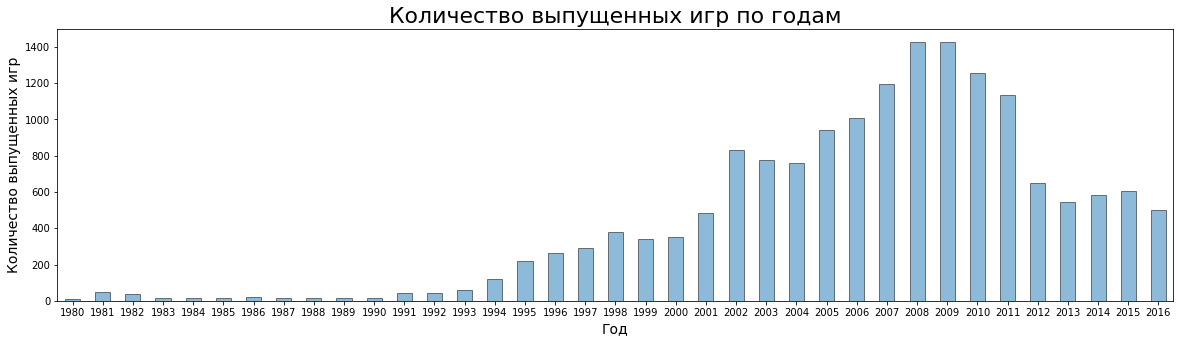

In [36]:
ax = data.groupby('year_of_release')['name'].count().plot.bar(figsize=(20, 5), rot=0, ec='black', alpha=0.5)

plt.title('Количество выпущенных игр по годам', fontsize = 22)
plt.xlabel('Год', fontsize = 14)
plt.ylabel('Количество выпущенных игр', fontsize = 14)
plt.show()

**Вывод:** Видно, что мы имеем данные за 36 лет (с 1980 по 2016 годы). Для прогноза нам не нужны такие старые данные, они покажут неистинную картину, так как время сильно изменилось, индустрия сильно развилась за это время и, если учитывть такой большой период, результат исследования может исказиться и выдать неверный прогноз. Тем более видно, что до 1995 года выходило очень мало игр, но при этом с каждым годом (до 2009 включительно) количество выпускаемых игр росло (пик количества выпускаемых игр приходится на 2008 и 2009 годы). С 2010 количество выпускаемых игр снижается. 

Для исследования целесообразно использовать данные за последние 5-10 лет.

### Как менялись продажи по платформам. 

Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: "За какой характерный срок появляются новые и исчезают старые платформы?"


In [37]:
# найдем топ 10 платформ с наибольшими суммарными продажами
top10 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()\
.sort_values(by='total_sales', ascending=False)
top10 = top10.reset_index(drop=True).head(10)
top10

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


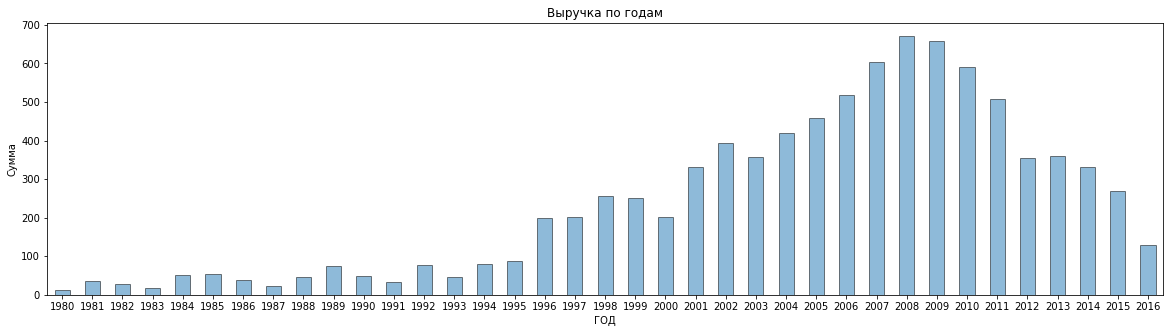

In [38]:
# посмотрим, как менялась выручка по годам
ax = data.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(20, 5), rot=0, ec='black', alpha=0.5)
plt.title('Выручка по годам')
plt.xlabel('ГОД')
plt.ylabel('Сумма')
plt.show()

Выручка менялась в прямой зависимости от количества выпущенных игр.

Посмотрим, как менялась выручка по годам по каждой платформе из топ 10 с наибольшими суммарными продажами

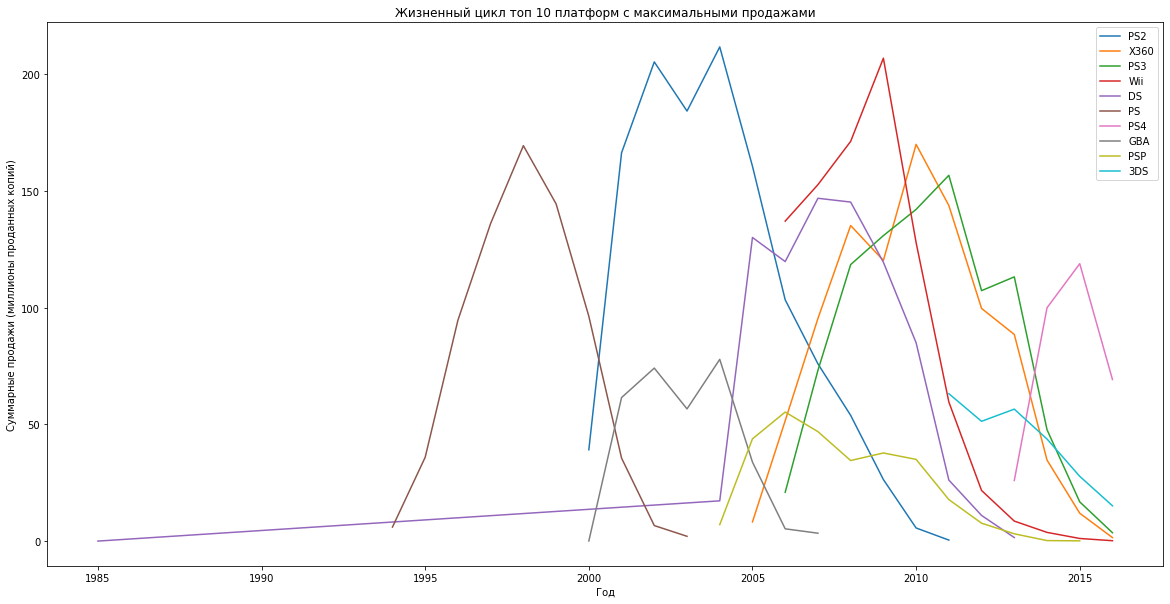

In [39]:
for name in top10['platform']:
    (data.query('platform == @name')\
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending = False)['total_sales']\
    .plot(figsize = (20, 10), label=name)
    )
    plt.title('Жизненный цикл топ 10 платформ с максимальными продажами')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи (миллионы проданных копий)')
    plt.legend() 

In [40]:
# посмотрим на выброс 1985 года у DS и за одно, есть ли значения по этой платформе до 2003 года
data.query('platform == "DS" and year_of_release < 2003')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,RP,0.02


Имеется один выброс по платформе DS от 1985 года (за период от 1985 до 2003 годы). Удаляем его, так как он может сильно повлиять на дальнейший анализ

In [41]:
data  = data.drop(index=15957)

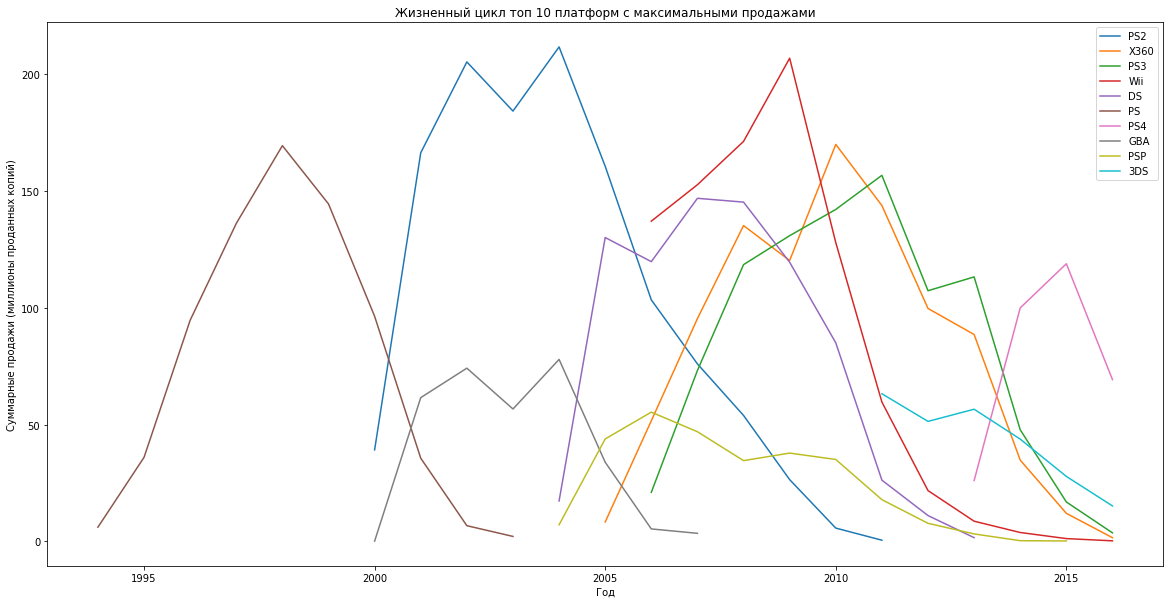

In [42]:
for name in top10['platform']:
    (data.query('platform == @name')\
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending = False)['total_sales']\
    .plot(figsize = (20, 10), label=name)
    )
    plt.title('Жизненный цикл топ 10 платформ с максимальными продажами')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи (миллионы проданных копий)')
    plt.legend() 

In [43]:
#Посчитаем жизненный цикл каждой платформы из общей массы
life_duration = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
life_duration.columns=['platform', 'min', 'max']
life_duration['duration'] = life_duration['max'] - life_duration['min']
life_duration

,platform,min,max,duration
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,2004,2013,9
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0


In [44]:
print(f'Средняя продолжительность жизни платформы за все время = {life_duration["duration"].mean().round(2)}')
print(f'Мода продолжительности жизни платформы за все время = {life_duration["duration"].mode()[0]}')

Средняя продолжительность жизни платформы за все время = 7.0
Мода продолжительности жизни платформы за все время = 9


In [45]:
life_duration["duration"].describe()

count    31.000000
mean      7.000000
std       5.899152
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: duration, dtype: float64

Средняя продолжительность жизни платформы за все время 7 лет, медиана - 6 лет, мода - 9 лет

In [46]:
life_duration_top10 = pd.DataFrame(columns=[])

for name in top10['platform']:
    life_duration_top10 = life_duration_top10.append((data.query('platform == @name')\
        .pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()))

life_duration_top10.columns=['platform', 'min', 'max']
life_duration_top10['duration'] = life_duration_top10['max'] - life_duration_top10['min']
life_duration_top10


,platform,min,max,duration
0,PS2,2000,2011,11
0,X360,2005,2016,11
0,PS3,2006,2016,10
0,Wii,2006,2016,10
0,DS,2004,2013,9
0,PS,1994,2003,9
0,PS4,2013,2016,3
0,GBA,2000,2007,7
0,PSP,2004,2015,11
0,3DS,2011,2016,5


In [47]:
print(f'Средняя продолжительность жизни платформы из Топ 10 = {life_duration_top10["duration"].mean().round(2)}') 

Средняя продолжительность жизни платформы из Топ 10 = 8.6


No handles with labels found to put in legend.


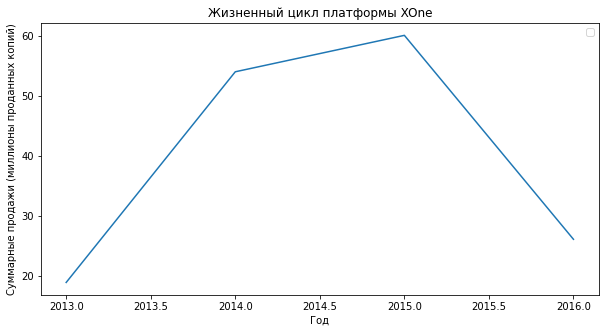

In [48]:
#взглянем на жизненный цикл платформы XOne
data.query('platform == "XOne"')\
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending = False)['total_sales']\
    .plot(figsize = (10, 5), label='')
    
plt.title('Жизненный цикл платформы XOne')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (миллионы проданных копий)')
plt.legend() 

**Отвечая на вопрос:** "за какой характерный срок появляются новые и исчезают старые платформы?" Можно сделать следующие выводы:

Средний срок жизни пладформы из ТОП10 = 8,6 лет. Почти все платформы из топ-10 уже изжили свой срок. Рассмотреть можно только платформы PS4 и 3DS, но по 3DS виден спад в продажах за последние несколько лет. У платформы PS4 наоборот, с 2013 по 2015 наблюдается рост продаж. Из графика можно сделать вывод, что пик прибыльности платформ происходит до середины срока жизненного цикла, после чего продажи начинают падать.

Видно, что платформа PS4 существует только 3 года, платформа 3DS уже 5 лет (что уже больше среднего рубежа, когда платформа может показать хорошие продажи).

Средняя продолжительность жизни платформы за все время 7 лет, медиана - 6 лет, мода - 9 лет

Из общего числа платформ можно выделить платформы XOne, которая существует 3 года и PSV - 5 лет, но общие продажи по ним составляют 159.32 и 53.81 миллионов проданных копий по каждой платформе соответсвенно. В дальнейшее исследование можно взять платформу XOne, так как она существует только 3 года, платформе PSV уже 5 лет, нецелесообразно брать ее в дальнейшее исследование. При этом на графике жизненного цикла платформы XOne наблюдался рост продаж с 2013 по 2015 год.

**Итого:** В дальнейшую работу берем данные за последние 2 года. Перспективными считаем платформу из ТОП 10 - PS4 и платформу XOne из общего списка платформ, которая так же имеет все шансы оказаться интересной для исслодования.

In [49]:
data = data.query("year_of_release > 2013")

### Подробный анализ перспективных платформ

In [50]:
# выделим данные по перспективным платформам в отдельный датафрейм
promising_platforms = data.query('platform in ["PS4", "XOne"]').reset_index(drop=True)
promising_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [51]:
# построим сводную таблицу по перспективным платформам
total_sales = promising_platforms.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
total_sales = total_sales.merge(life_duration, how='left', on='platform')
total_sales

,platform,total_sales,min,max,duration
0,PS4,288.15,2013,2016,3
1,XOne,140.36,2013,2016,3


Диаграмма размаха


Text(0.5, 0, 'Продажи по платформам')

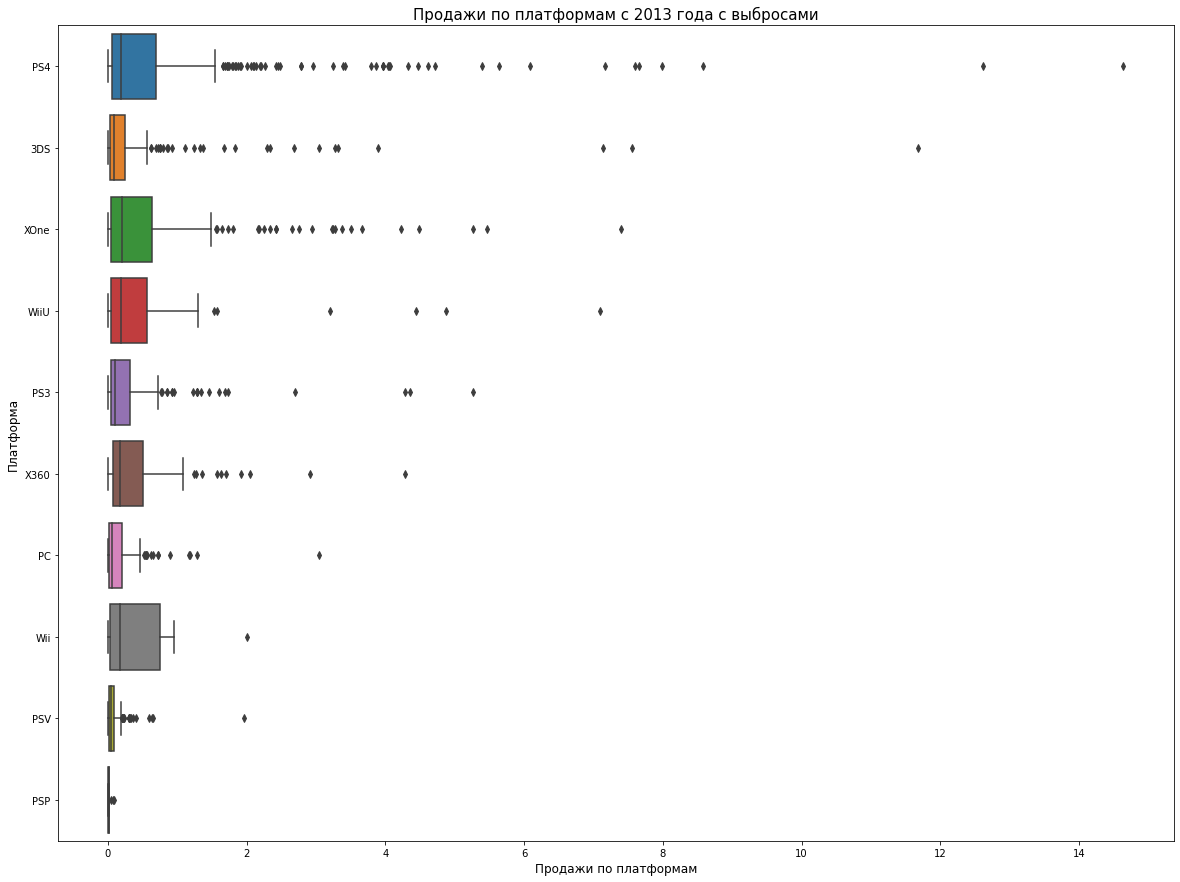

In [52]:
# Построим диаграмму размаха по продажам платформ
print('Диаграмма размаха')
plt.figure(figsize=(20,15))
sns.boxplot(data=data, y='platform', x='total_sales', orient="h")
plt.title('Продажи по платформам с 2013 года с выбросами', fontsize=15)
plt.ylabel('Платформа', fontsize=12)
plt.xlabel('Продажи по платформам',fontsize=12)

Диаграмма размаха


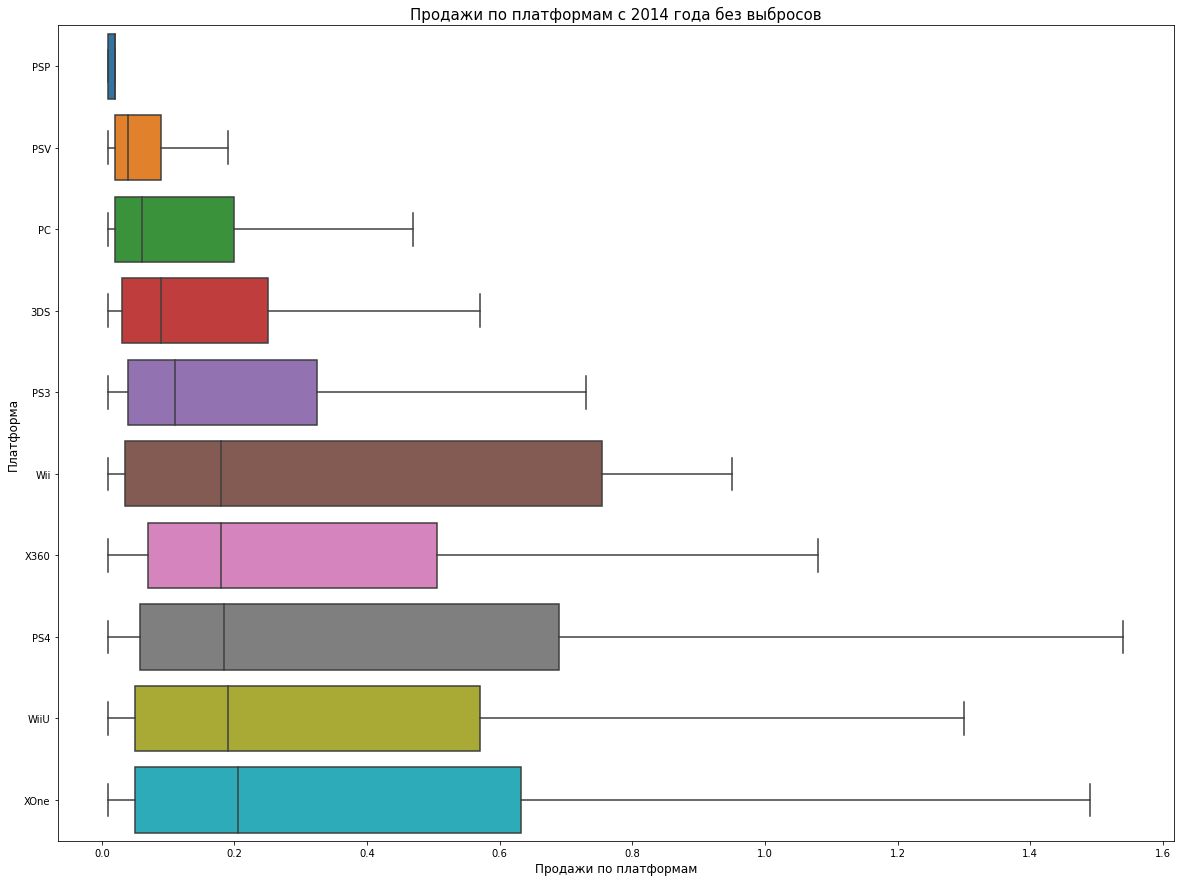

In [53]:
# Построим увеличенную диаграмму размаха по продажам по платформ
print('Диаграмма размаха')
plt.figure(figsize=(20,15))
grouped = data.groupby(['platform']).median().sort_values(by='total_sales')
sns.boxplot(data=data, y='platform', x='total_sales', orient="h", showfliers=False, order=grouped.index)
plt.title('Продажи по платформам с 2014 года без выбросов', fontsize=15)
plt.ylabel('Платформа', fontsize=12)
plt.xlabel('Продажи по платформам',fontsize=12)
plt.show()

**Вывод:** Видно, что платформа PS4 имеет больше выбросов, чем платформа XOne. Платформа PS4 лидирует и в ощем количестве продаж и статистически график выглядит более привлекательным, однако у платформы XOne хоть и ниже продажи, медиана самая высокая, по сравнению с остальными платформами, она выглядит одной из самых привлекательных.

Из этого подтверждаем наш вывод, что платформы  PS4 и XOne более перспективны для нас. При этом у них двоих одинаковый срок жизни - 3 года.

### Оценим влияние на продажи внутри каждой популярной платформы отзывов  критиков

**PS4**

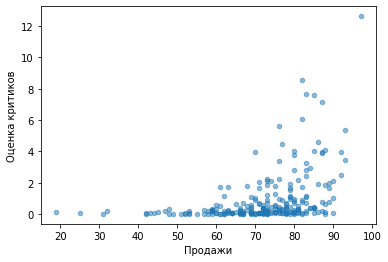

In [54]:
promising_platforms.query("platform == 'PS4'").plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5) 
plt.ylabel('Оценка критиков')
plt.xlabel('Продажи')
plt.show()


In [55]:
print(f'''Коэффициент корреляции по платформе PS4 = '''
f'''{promising_platforms.query("platform == 'PS4'")['critic_score'].corr(promising_platforms['total_sales']).round(2)}''')


Коэффициент корреляции по платформе PS4 = 0.4


**XOne**

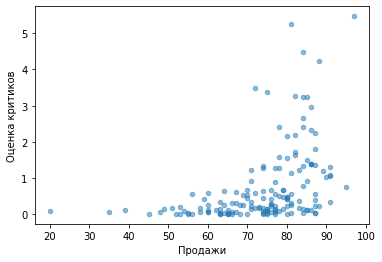

In [56]:
promising_platforms.query("platform == 'XOne'").plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5) 
plt.ylabel('Оценка критиков')
plt.xlabel('Продажи')
plt.show()

In [57]:
print(f'''Коэффициент корреляции по платформе XOne = {promising_platforms.query("platform == 'XOne'")['critic_score'].corr(promising_platforms['total_sales']).round(2)}''')


Коэффициент корреляции по платформе XOne = 0.43


**Вывод:** Положительная зависимость продаж от отценки критиков по перспективным платформам имеется, но слабая. По PS4 = 0.4, по XOne = 0.43

**Оценим влияние на продажи отзывов критиков на всех данных по всем платформам**

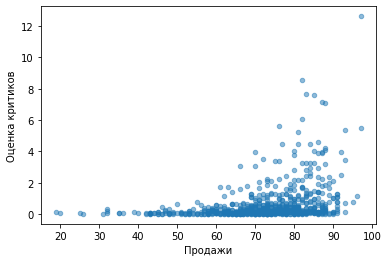

In [58]:
data.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5) 
plt.ylabel('Оценка критиков')
plt.xlabel('Продажи')
plt.show()

In [59]:
print(f'''Коэффициент корреляции по всем платформам = {data['critic_score'].corr(promising_platforms['total_sales']).round(2)}''')


Коэффициент корреляции по всем платформам = 0.35


**Вывод:** зависимость продаж от оценки критиков с 2013 года по всем платформам слабая и равна 0,35, что схоже с завиимостью в перспективных платформах

### Оценим влияние на продажи внутри каждой популярной платформы отзывов пользователей 

**PS4**

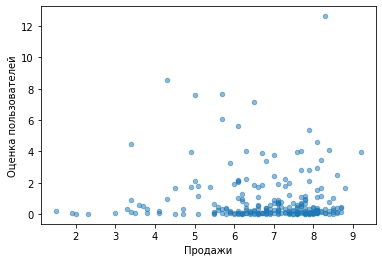

In [60]:
promising_platforms.query("platform == 'PS4'").plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5) 
plt.ylabel('Оценка пользователей')
plt.xlabel('Продажи')
plt.show()

In [61]:
print(f'''Коэффициент корреляции по платформе PS4 = '''
     f'''{promising_platforms.query("platform == 'PS4'")['user_score'].corr(promising_platforms['total_sales']).round(2)}''')


Коэффициент корреляции по платформе PS4 = -0.04


**XOne**

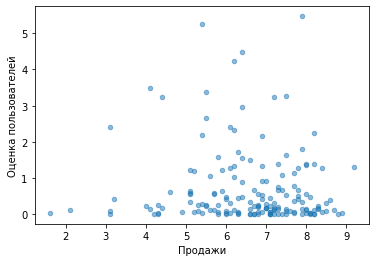

In [62]:
promising_platforms.query("platform == 'XOne'").plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5) 
plt.ylabel('Оценка пользователей')
plt.xlabel('Продажи')
plt.show()

In [63]:
print(f'''Коэффициент корреляции по платформе XOne = '''
      f'''{promising_platforms.query("platform == 'XOne'")['user_score'].corr(promising_platforms['total_sales']).round(2)}''')


Коэффициент корреляции по платформе XOne = -0.07


**Вывод:** Зависимости продаж от отценки критиков по платформам XOne и PS4 не наблюдается. 

**Оценим влияние на продажи оценки пользователей на всех данных по всем платформам**

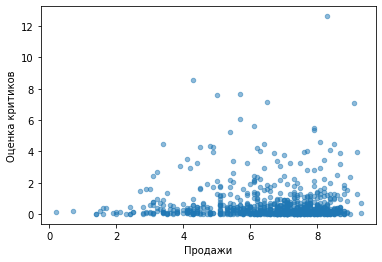

In [64]:
data.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5) 
plt.ylabel('Оценка критиков')
plt.xlabel('Продажи')
plt.show()

In [65]:
print(f'''Коэффициент корреляции по всем платформам = '''
f'''{data['user_score'].corr(promising_platforms['total_sales']).round(3)}''')


Коэффициент корреляции по всем платформам = 0.048


**Вывод:** зависимости продаж от оценки пользователей по всем платформам не наблюдается (коэффициент корреляции = 0,048)


### Оценка распределения игр по жанрам и продаж по жанрам

**Оценим игры по жанрам за предыдущие 3 года**

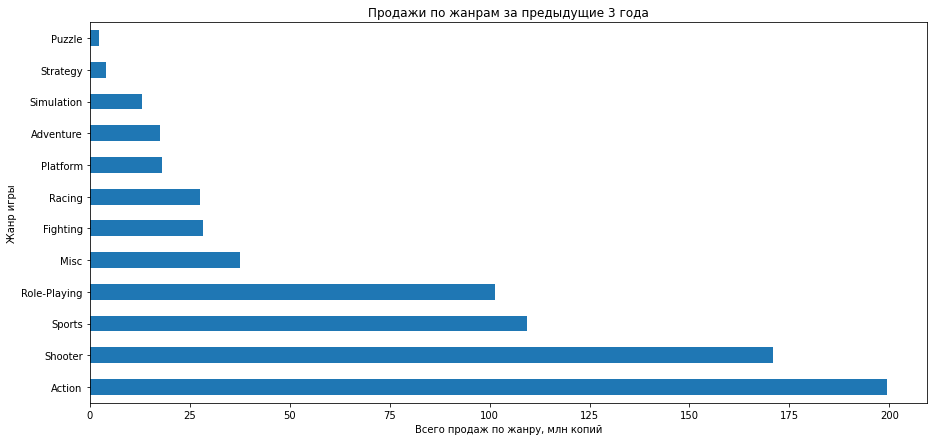

In [66]:
# посмотрим на общее количество продаж игр по жанрам за предыдущие 3 года
data.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
 .sort_values('total_sales', ascending=False)\
 .plot(kind = 'barh', y='total_sales', figsize=(15, 7), title = 'Продажи по жанрам за предыдущие 3 года', legend=False)\
 .set(ylabel='Жанр игры', xlabel='Всего продаж по жанру, млн копий')

plt.show()

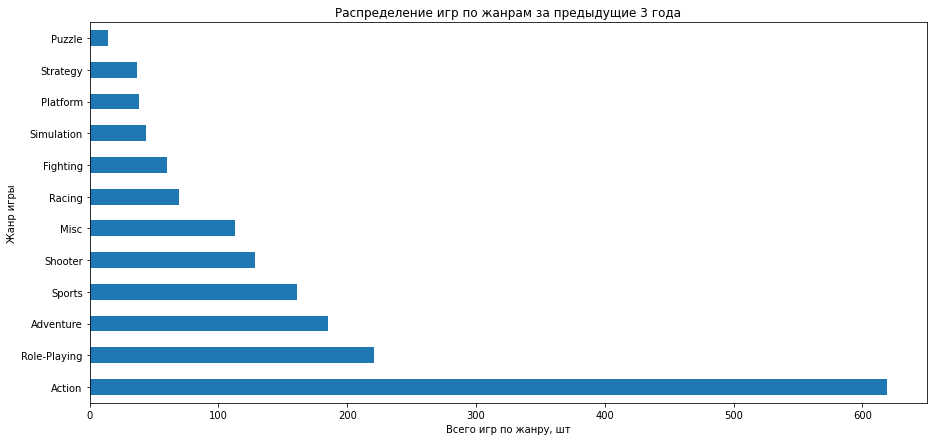

In [67]:
# посмотрим на общее распределение игр по жанрам за предыдущие 3 года
data.pivot_table(index='genre', values='name', aggfunc='count')\
 .sort_values('name', ascending=False)\
 .plot(kind='barh', y='name', figsize=(15, 7), title = 'Распределение игр по жанрам за предыдущие 3 года', \
 legend=False).set(ylabel='Жанр игры', xlabel='Всего игр по жанру, шт')

plt.show()

**Оценим игры по жанрам перспективных платформ**

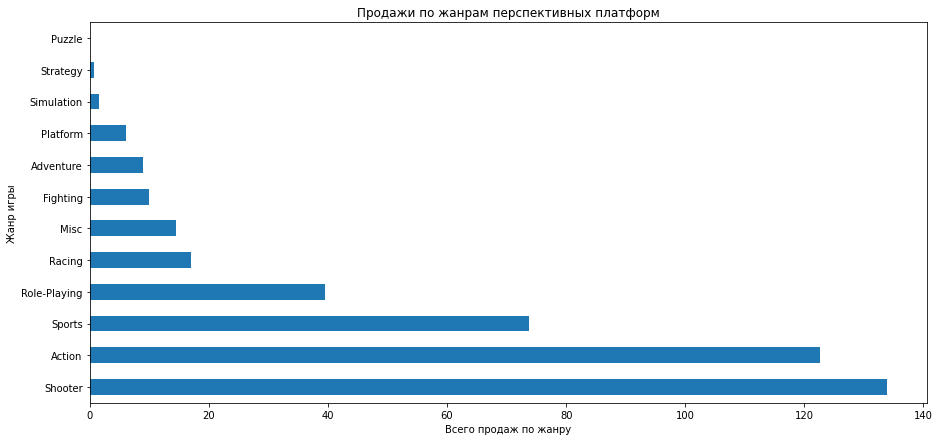

In [68]:
# посмотрим на количество продаж игр по жанрам перспективных платформ
promising_platforms.pivot_table(index='genre', values='total_sales', aggfunc='sum')\
 .sort_values('total_sales', ascending=False)\
 .plot(kind='barh', y='total_sales', figsize=(15, 7), title = 'Продажи по жанрам перспективных платформ', legend=False)\
 .set(ylabel='Жанр игры', xlabel='Всего продаж по жанру')

plt.show()

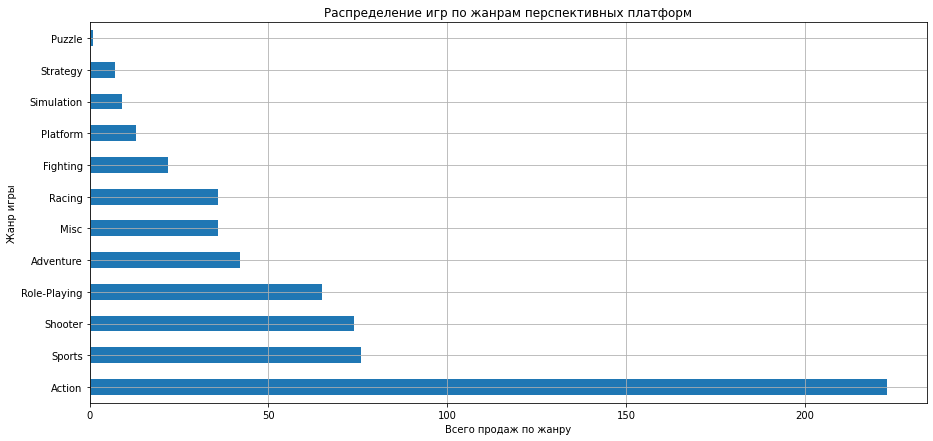

In [69]:
# посмотрим на распределение игр по жанрам перспективных платформ
import matplotlib.pyplot as plt
ax = promising_platforms.pivot_table(index='genre', values='name', aggfunc='count')\
 .sort_values('name', ascending=False)\
 .plot(kind='barh', y='name', figsize=(15, 7), title = 'Распределение игр по жанрам перспективных платформ',\
       legend=False, grid=True)\
 .set(ylabel='Жанр игры', xlabel='Всего продаж по жанру')

plt.show()

Диаграмма размаха


Text(0.5, 0, 'Продажи по жанрам, млн копий')

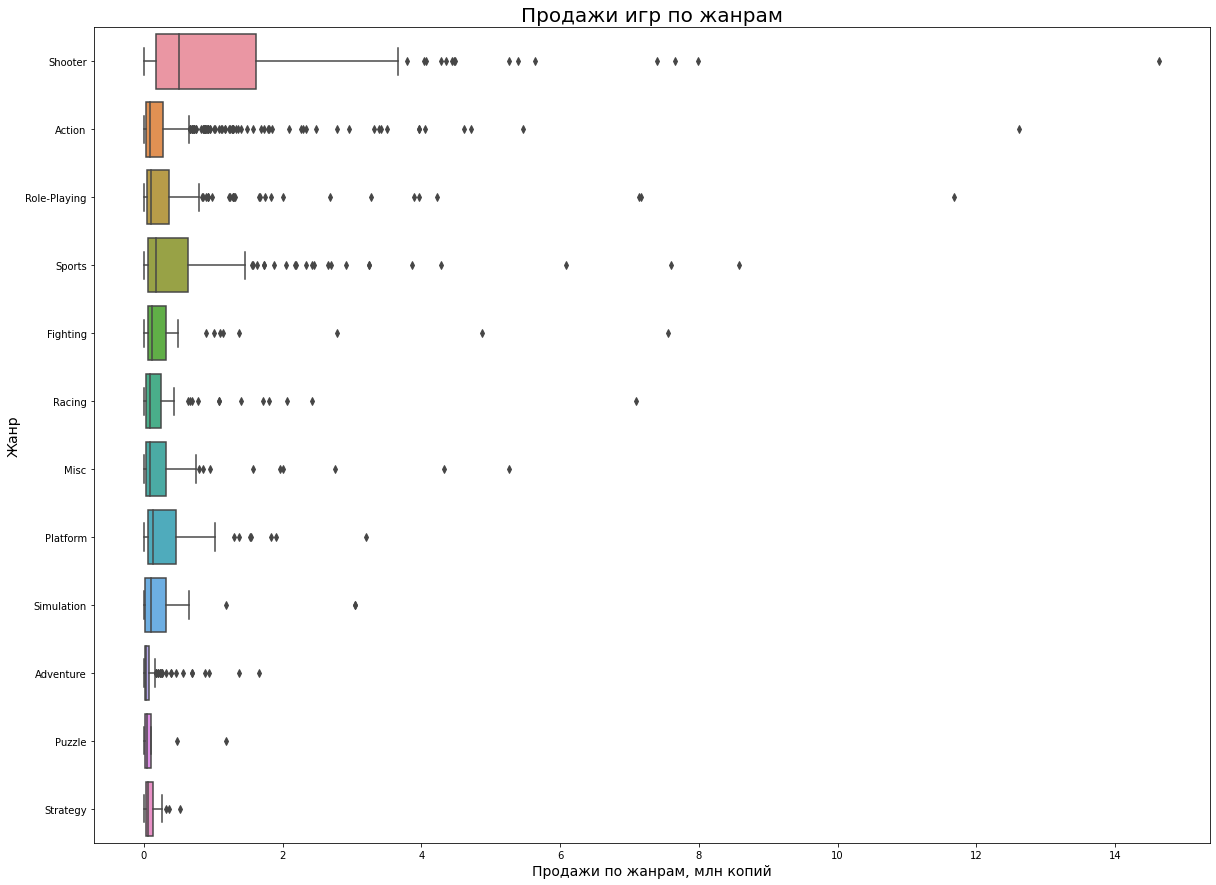

In [70]:
# Построим диаграмму размаха по продажам игр по жанрам
print('Диаграмма размаха')
plt.figure(figsize=(20,15))
sns.boxplot(data=data, y='genre', x='total_sales', orient="h")
plt.title('Продажи игр по жанрам', fontsize=20)
plt.ylabel('Жанр', fontsize=14)
plt.xlabel('Продажи по жанрам, млн копий', fontsize=14)


Диаграмма размаха


Text(0.5, 0, 'Продажи по жанрам, млн копий')

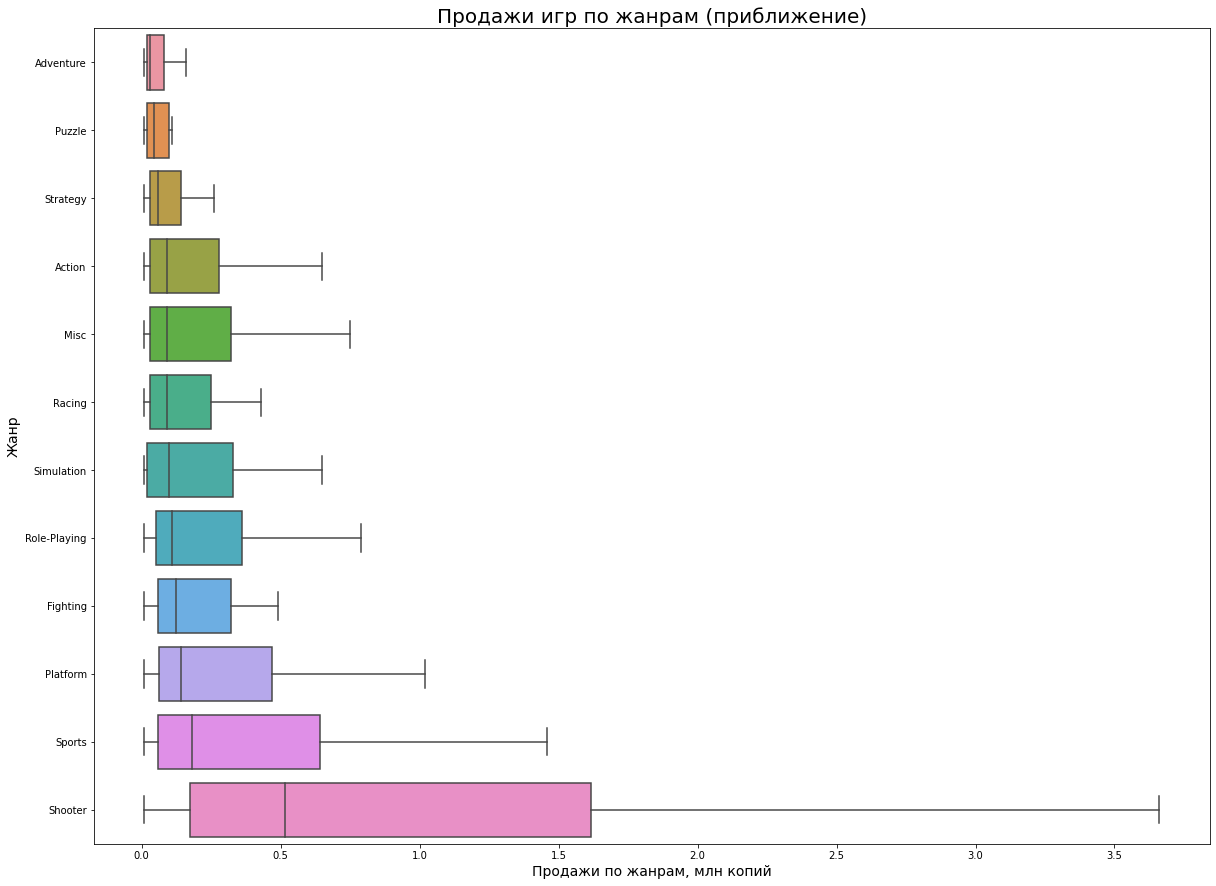

In [71]:
# Построим диаграмму размаха по продажам игр по жанрам
print('Диаграмма размаха')
plt.figure(figsize=(20,15))
grouped = data.groupby(['genre']).median().sort_values(by='total_sales')
sns.boxplot(data=data, y='genre', x='total_sales', orient="h", showfliers=False, order=grouped.index)
plt.title('Продажи игр по жанрам (приближение)', fontsize=20)
plt.ylabel('Жанр', fontsize=14)
plt.xlabel('Продажи по жанрам, млн копий', fontsize=14)


**Вывод:** И в количестве игр и в количестве продаж сильно выделяется жанр Shooter. По продажам далее идут Sports и Platform.
Самые низкие продажи у Adventure и Puzzle.

## Составление портрета пользователя каждого региона

### Самые популярные платформы (топ-5) в Северной Америке, Европе, Японии и других странах .  
Опишишим различия в долях продаж.

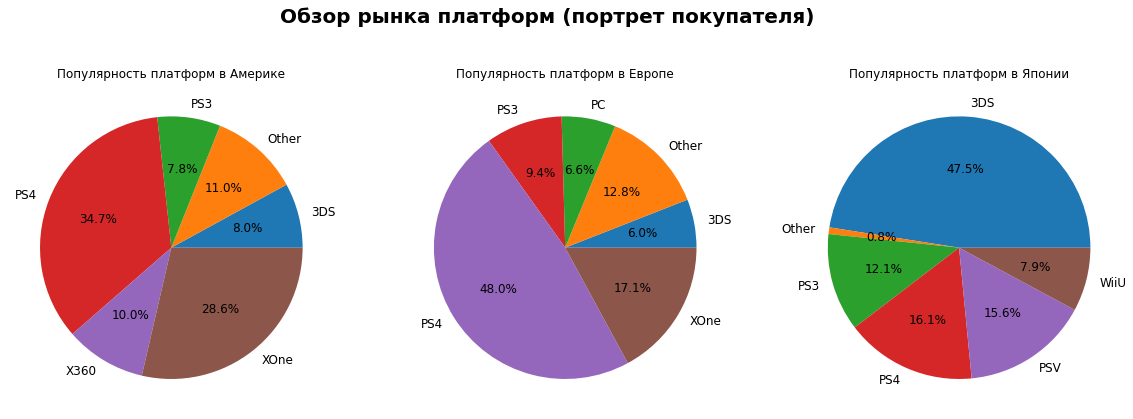

In [72]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=False, figsize=(20, 7))

na_data = data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)\
.reset_index()

na_other = na_data[5:]

na_data['platform'] = na_data['platform'].where(~na_data.index.isin(na_other.index), 'Other')
na_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').plot(kind='pie', y='na_sales', autopct='%1.1f%%', \
              legend=False, title = 'Популярность платформ в Америке', ax=ax0, ylabel='', fontsize=12)
        
    
eu_data = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)\
.reset_index()

eu_other = eu_data[5:]

eu_data['platform'] = eu_data['platform'].where(~eu_data.index.isin(eu_other.index), 'Other')
eu_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').plot(kind='pie', y='eu_sales', autopct='%1.1f%%', \
              legend=False, title = 'Популярность платформ в Европе', ax=ax1, ylabel='', fontsize=12)
        
    
jp_data = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)\
.reset_index()

jp_other = jp_data[5:]

jp_data['platform'] = jp_data['platform'].where(~jp_data.index.isin(jp_other.index), 'Other')
jp_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').plot(kind='pie', y='jp_sales', autopct='%1.1f%%', \
              legend=False, title = 'Популярность платформ в Японии', ax=ax2, ylabel='', fontsize=12)

fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=20, fontweight='bold');

**Вывод:** В Америке и в Европе самой популярной платформой является PS4 (34,7 и 48 % соответственно), в Японии 3DS (занимает почти 47,5% продаж). Видим, что Xone наиболее популярна в Америке (28,6%), Европа немного отстает (17,1%). 3DS является наиболее популярной в Японии, при этом она не особо популярна в остальных регионах. PS4 в Японии занимает 16,1% от всех продаж по платформам.

### Самые популярные жанры (топ-5) в Северной Америке, Европе, Японии и других странах. 
Поясните разницу.

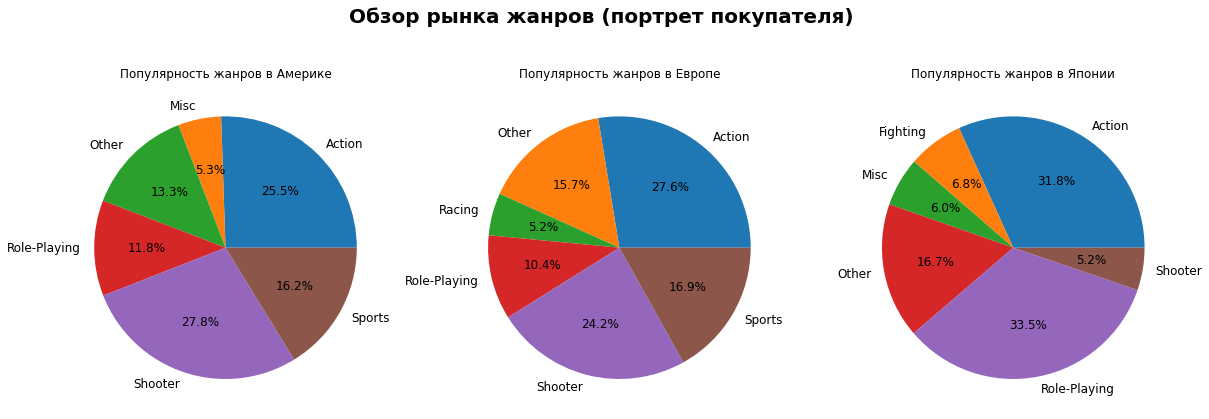

In [75]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=False, figsize=(20, 7))

na_data = data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)\
.reset_index()

na_other = na_data[5:]

na_data['genre'] = na_data['genre'].where(~na_data.index.isin(na_other.index), 'Other')
na_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').plot(kind='pie', y='na_sales', autopct='%1.1f%%', \
              legend=False, title = 'Популярность жанров в Америке', ax=ax0, ylabel='', fontsize=12)
        
    
eu_data = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)\
.reset_index()

eu_other = eu_data[5:]

eu_data['genre'] = eu_data['genre'].where(~eu_data.index.isin(eu_other.index), 'Other')
eu_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').plot(kind='pie', y='eu_sales', autopct='%1.1f%%', \
              legend=False, title = 'Популярность жанров в Европе', ax=ax1, ylabel='', fontsize=12)
        
    
jp_data = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)\
.reset_index()

jp_other = jp_data[5:]

jp_data['genre'] = jp_data['genre'].where(~jp_data.index.isin(jp_other.index), 'Other')
jp_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').plot(kind='pie', y='jp_sales', autopct='%1.1f%%', \
              legend=False, title = 'Популярность жанров в Японии', ax=ax2, ylabel='', fontsize=12)

fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize=20, fontweight='bold');

**Вывод:** Наиболее популярный жанр в Америке и Европе - Action (занимает 25,5% и 27,6% рынка соответсвенно ). В Японии самым популярным жанром явлется Role-playing (33,5% рынка), однако на втором месте находится Action (31,8%). В Америке и Европе второе место по популярности занимает Shooter (27,8 и 24,25).

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

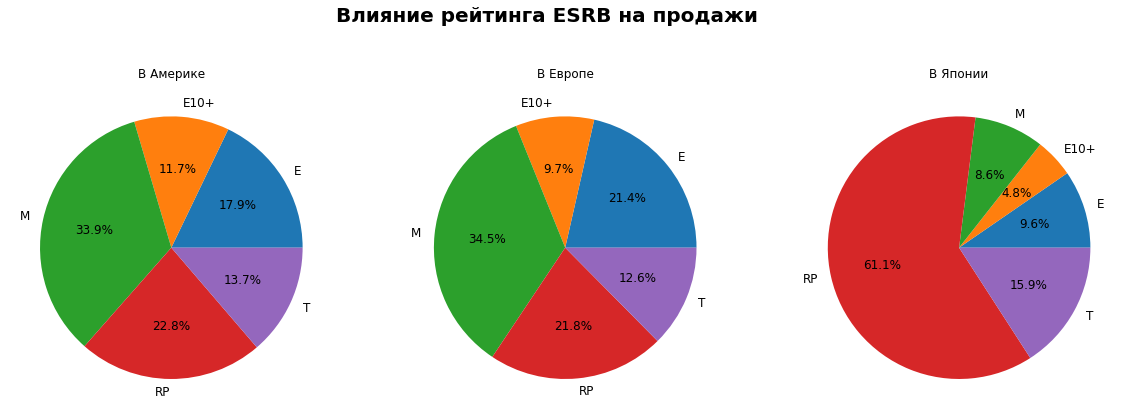

In [76]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=False, figsize=(20, 7))

na_data = data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)\
.reset_index()

na_other = na_data[5:]

na_data['rating'] = na_data['rating'].where(~na_data.index.isin(na_other.index), 'Other')
na_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='pie', y='na_sales', autopct='%1.1f%%', \
              legend=False, title = 'В Америке', ax=ax0, ylabel='', fontsize=12)
        
    
eu_data = data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)\
.reset_index()

eu_other = eu_data[5:]

eu_data['rating'] = eu_data['rating'].where(~eu_data.index.isin(eu_other.index), 'Other')
eu_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(kind='pie', y='eu_sales', autopct='%1.1f%%', \
              legend=False, title = 'В Европе', ax=ax1, ylabel='', fontsize=12)
        
    
jp_data = data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)\
.reset_index()

jp_other = jp_data[5:]

jp_data['rating'] = jp_data['rating'].where(~jp_data.index.isin(jp_other.index), 'Other')
jp_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind='pie', y='jp_sales', autopct='%1.1f%%', \
              legend=False, title = 'В Японии', ax=ax2, ylabel='', fontsize=12)

fig.suptitle('Влияние рейтинга ESRB на продажи', fontsize=20, fontweight='bold');

Значение рейтинга:

E - Все

Е 10+ – Все в возрасте 10+

T - подросток

M – Зрелые (17+)

RP - рейтинг не определен


**Вывод:** В Америке и Европе самый популярный рейтинг "М" - Зрелые (17+) и занмает от 34% рынка. На втором месте "RP" - рейтинг не определен(примерно 22% рынка), на третьем "E" - Все (от 18% рынка).
В Японии на первом месте "RP" - рейтинг не определен(занимает аж 61% рынка), на втором "Т" - подросток (16 % рынка).


## Проверка гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза Н0:** Средние пользовательские рейтинги платформ Xbox One и PC равны

**Альтернативная гипотеза Н1:** Средние пользовательские рейтинги платформ Xbox One и PC не равны


In [77]:
data['user_score'].isna().sum()

801

In [78]:
xone = data.query("platform == 'XOne' and ~user_score.isna()")
ps4 = data.query("platform == 'PS4' and ~user_score.isna()")

print(f'Среднее выборки с XOne {xone["user_score"].mean()}')
print(f'Среднее выборки c PS4 {ps4["user_score"].mean()}')
print()

alpha = 0.05

results = st.ttest_ind(xone["user_score"], ps4["user_score"])
print(results.pvalue)
print()

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки с XOne 6.594545454545456
Среднее выборки c PS4 6.82809917355372

0.09668975421672833

Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу. Вероятность того, что средние пользовательские рейтинги платформ Xbox One и PC равны составляет примерно 9,67%. То есть мы не можем предполагать, что данные противоречат нулевой гипотезе. 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Нулевая гипотеза Н0:** Средние пользовательские рейтинги жанров Action и Sports равны.

**Альтернативная гипотеза Н1:** Средние пользовательские рейтинги жанров Action и Sports не равны.


In [80]:
# выборки очень отличаются друг от друга
data['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

In [81]:
action = data.query("genre == 'Action' and ~user_score.isna()")
sports = data.query("genre == 'Sports' and ~user_score.isna()")

print(f'Среднее выборки с Action {action["user_score"].mean()}')
print(f'Среднее выборки c Sports {sports["user_score"].mean()}')
print()

alpha = 0.05

results = st.ttest_ind(action["user_score"], sports["user_score"], equal_var=False)
print(results.pvalue)
print()

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее выборки с Action 6.760606060606061
Среднее выборки c Sports 5.2251968503937

1.1825550382644557e-14

Отвергаем нулевую гипотезу


**Вывод:** Нулевую гипотезу удалось отвергнуть. Полученное значение p-value говорит о том, что с вероятностью практически 0% средние пользовательские рейтинги жанров Action и Sports равны. То есть мы можем предполагать, что рейтинги не равны.

## Общий вывод и рекомендации

<div style="border:solid orange 2px; padding: 40px">
    
**Общий вывод исследования данных:** 
    
Для анализа нам были предоставленны данные за 36 лет (с 1980 по 2016 годы). Для прогноза нам не нужны такие старые данные, они покажут неистинную картину, так как время сильно изменилось, индустрия сильно развилась за это время и, если учитывть такой большой период, результат исследования может исказиться и выдать неверный прогноз. 
Из анализа видно, что до 1995 года выходило очень мало игр, но при этом с каждым годом (до 2009 включительно) количество выпускаемых игр росло (пик количества выпускаемых игр приходится на 2008 и 2009 годы). С 2010 количество выпускаемых игр снижается. 

Для исследования мы использовали данные за последние 3 года.


Общее количество продаж находится в прямой зависимости от количества выпущенных игр.



Средний срок жизни пладформы из ТОП10 = 8,6 лет. Почти все платформы из топ-10 уже изжили свой срок. Рассмотреть можно только платформы PS4 и 3DS, но по 3DS виден спад в продажах за последние несколько лет. У платформы PS4 наоборот, с 2013 по 2015 наблюдается рост продаж. Из графика можно сделать вывод, что пик прибыльности платформ происходит до середины срока жизненного цикла, после чего продажи начинают падать.

Видно, что платформа PS4 существует только 3 года, платформа 3DS уже 5 лет (что уже больше среднего рубежа, когда платформа может показать хорошие продажи).

Средняя продолжительность жизни платформы за все время 7 лет, медиана - 6 лет, мода - 9 лет

Из общего числа платформ можно выделить платформы XOne, которая существует 3 года и PSV - 5 лет, но общие продажи по ним составляют 159.32 и 53.81 миллионов проданных копий по каждой платформе соответсвенно. В дальнейшее исследование можно взять платформу XOne, так как она существует только 3 года, платформе PSV уже 5 лет, нецелесообразно брать ее в дальнейшее исследование. При этом на графике жизненного цикла платформы XOne наблюдался рост продаж с 2013 по 2015 год.

**Итого:** В дальнейшую работу берем данные за последние 2 года. Перспективными считаем платформу из ТОП 10 - PS4 и платформу XOne из общего списка платформ, которая так же имеет все шансы оказаться интересной для исслодования.


Видно, что платформа PS4 имеет больше выбросов, чем платформа XOne. Платформа PS4 лидирует и в ощем количестве продаж и статистически график выглядит более привлекательным, однако у платформы XOne хоть и ниже продажи, медиана самая высокая, по сравнению с остальными платформами, она выглядит одной из самых привлекательных.

Из этого подтверждаем наш вывод, что платформы  PS4 и XOne более перспективны для нас. При этом у них двоих одинаковый срок жизни - 3 года.

Зависимость продаж от оценки критиков с 2014 года по всем платформам слабая и равна 0,31, что схоже с завиимостью в перспективных платформах

Зависимости продаж от оценки пользователей по всем платформам не наблюдается (коэффициент корреляции = равна 0,002)

И в количестве игр и в количестве продаж сильно выделяется жанр Shooter. По продажам далее идут Sports и Platform. Самые низкие продажи у Adventure и Puzzle.

В Америке и в Европе самой популярной платформой является PS4 (34,7 и 48 % соответственно), в Японии 3DS (занимает почти 47,5% продаж). Видим, что Xone наиболее популярна в Америке (28,6%), Европа немного отстает (17,1%). 3DS является наиболее популярной в Японии, при этом она не особо популярна в остальных регионах. PS4 в Японии занимает 16,1% от всех продаж по платформам.

Наиболее популярный жанр в Америке и Европе - Action (занимает 25,5% и 27,6% рынка соответсвенно ). В Японии самым популярным жанром явлется Role-playing (33,5% рынка), однако на втором месте находится Action (31,8%). В Америке и Европе второе место по популярности занимает Shooter (27,8 и 24,25).

В Америке и Европе самый популярный рейтинг "М" - Зрелые (17+) и занмает от 34% рынка. На втором месте "RP" - рейтинг не определен(примерно 22% рынка), на третьем "E" - Все (от 18% рынка). В Японии на первом месте "RP" - рейтинг не определен(занимает аж 61% рынка), на втором "Т" - подросток (16 % рынка).
    
**Общий вывод после проверки гипотез:** 
    
 Не получилось отвергнуть нулевую гипотезу. Вероятность того, что средние пользовательские рейтинги платформ Xbox One и PC равны составляет примерно 9,67%. То есть мы не можем предполагать, что данные противоречат нулевой гипотезе. 
    
 Нулевую гипотезу удалось отвергнуть. Полученное значение p-value говорит о том, что с вероятностью практически 0% средние пользовательские рейтинги жанров Action и Sports равны. То есть мы можем предполагать, что рейтинги не равны.
    
**Итог:**   платформы  PS4, XOne являются более перспективными на 2017 год. 
    
    
**Рекомендация** - Для Америки и Европы лучше подойдут платформы PS4 и Xone, жанры - Action и Shooter, рейтинг "М", "E" и игры без рейтинга. Для Японии платформа PS4, жанр Role-playing и Action, рейтинг  "T" и игры без рейтинга.
    
 </div>